# Dependências

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Configurações

In [3]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [4]:
voc = ["EU", "VOCÊ", "É", "SOU", "MUITO", "LEGAL", "DEMAIS", "INCRÍVEL"]

def encode(text):
  a_text = text.split(" ")
  r = []
  for i in a_text:
    if i in voc:
      r.append(voc.index(i))
  return np.array(r)


def decode(a_text):
  return voc[np.argmax(a_text)]

# Dataset

In [5]:
data = np.array([
    encode("EU SOU MUITO LEGAL"),
    encode("MUITO LEGAL EU SOU"),
    encode("EU SOU LEGAL DEMAIS"),
    encode("VOCÊ É MUITO LEGAL"),
    encode("VOCÊ É LEGAL DEMAIS")
    ])

targets = data[:,-1]
inputs = data[:,0:3]

print(f"Inputs: \n{inputs}")
print(f"Targets: \n{targets}")

Inputs: 
[[0 3 4]
 [4 5 0]
 [0 3 5]
 [1 2 4]
 [1 2 5]]
Targets: 
[5 3 6 5 6]


# Arquitetura

In [6]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1), activation='tanh'))
model.add(Dense(8, activation='softmax'))

# Compile o modelo
learning_rate = 0.1
#adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy')

# Imprime a arquitetura
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 8)                 88        
                                                                 
Total params: 208 (832.00 Byte)
Trainable params: 208 (832.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


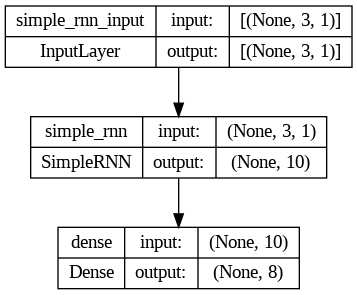

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Treinamento

In [8]:
# Hiperparâmetros
epochs = 500

# Treine o modelo
log = model.fit(inputs, targets, epochs=epochs)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.3471
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 2.0905
Epoch 3/500
1/1 [==============================] - 0s 37ms/step - loss: 1.8833
Epoch 4/500
1/1 [==============================] - 0s 29ms/step - loss: 1.7132
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 1.5742
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 1.4592
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 1.3620
Epoch 8/500
1/1 [==============================] - 0s 44ms/step - loss: 1.2787
Epoch 9/500
1/1 [==============================] - 0s 18ms/step - loss: 1.2068
Epoch 10/500
1/1 [==============================] - 0s 23ms/step - loss: 1.1444
Epoch 11/500
1/1 [==============================] - 0s 20ms/step - loss: 1.0900
Epoch 12/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0424
Epoch 13/500
1/1 [==============================] -

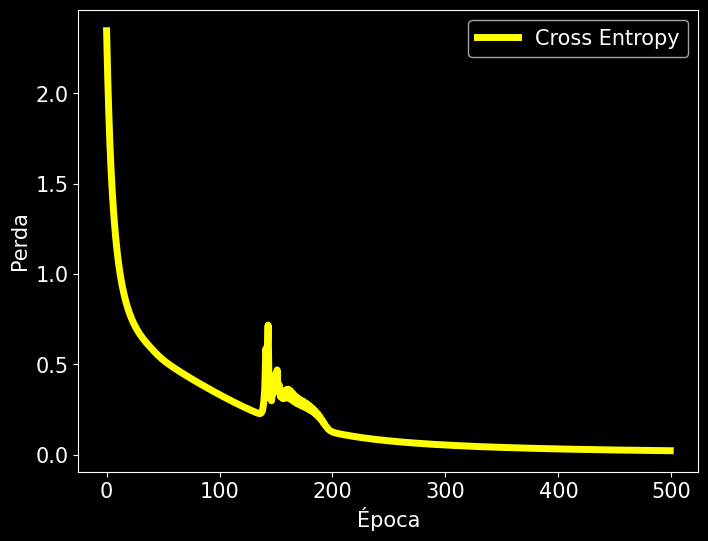

In [9]:
losses = log.history["loss"]
data_epochs = np.arange(0, epochs, 1)

plt.plot(data_epochs, losses, color="yellow", lw=5, label = 'Cross Entropy')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Teste

In [10]:
# Testa a previsão com uma nova sequência
#test_sequence = [1, 0, 1]

text = "EU SOU MUITO" #Valor conhecido
text = "VOCÊ É INCRÍVEL" #valor desconhecido
# text = "SOU MUITO INCRÍVEL" #valor desconhecido meio provável
# text = "VOCÊ É EU" #valor desconhecido improvável
# text = "EU SOU É" #valor desconhecido improvável

test_sequence = encode(text)
predicted_output = model.predict(np.array([test_sequence]))

print(f"Vocabulário: {voc}")
print()
print(f"Frases conhecidas:\n")

for i in range(len(inputs)):
    s = ""
    for j in inputs[i]:
      s += voc[j] +" "
    print(f"{s}{decode(targets[i])}")

print()

print(f"Sequência de entrada: {test_sequence}")
print(f"Sequência prevista: {predicted_output}")
print()

print(f"Texto de entrada: {text} ...")
print(f"Texto de saída: {text} {decode(predicted_output)}. ({np.max(predicted_output)})")


1/1 [==============================] - 0s 173ms/step
Vocabulário: ['EU', 'VOCÊ', 'É', 'SOU', 'MUITO', 'LEGAL', 'DEMAIS', 'INCRÍVEL']

Frases conhecidas:

EU SOU MUITO EU
MUITO LEGAL EU EU
EU SOU LEGAL EU
VOCÊ É MUITO EU
VOCÊ É LEGAL EU

Sequência de entrada: [1 2 7]
Sequência prevista: [[1.8761279e-05 1.7680582e-05 1.9474031e-05 3.7184811e-06 2.8213559e-05
  6.1541097e-04 9.9926037e-01 3.6456157e-05]]

Texto de entrada: VOCÊ É INCRÍVEL ...
Texto de saída: VOCÊ É INCRÍVEL DEMAIS. (0.9992603659629822)
